In [ ]:
from google.colab import files

uploaded = files.upload()


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Step 1: Load the actual train_data.txt file
def load_train_data(file_path):
    rows = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                _, title, genre, plot = parts
                rows.append((title, genre, plot))
    return pd.DataFrame(rows, columns=["title", "genre", "plot"])

# Step 2: Preprocess plot text
def preprocess_text(text):
    text = text.lower()                                 # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)                # Remove punctuation/numbers
    tokens = text.split()                               # Tokenize
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return ' '.join(tokens)

# Step 3: Apply preprocessing
df = load_train_data("train_data.txt")
df['clean_plot'] = df['plot'].apply(preprocess_text)

df.head()  # Just shows the top 5 rows




,title,genre,plot,clean_plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents yearold ...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# 1️⃣ TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_plot'])

# # Labels
y = df['genre']  # Already label encoded earlier


In [ ]:
from sklearn.model_selection import train_test_split

# Split for TF-IDF
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=2000)

Logistic Test accuracy: 0.5781

Classification Report:
              precision    recall  f1-score   support

      action       0.55      0.24      0.33       263
       adult       0.82      0.21      0.33       112
   adventure       0.46      0.14      0.21       139
   animation       0.56      0.05      0.09       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.58      0.54      1443
       crime       0.40      0.02      0.04       107
 documentary       0.66      0.85      0.74      2659
       drama       0.54      0.79      0.64      2697
      family       0.45      0.07      0.12       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.66      0.57      0.61       431
       music       0.68      0.47      0.56       144
     musical       1.00      0.02      0.04        50
     mystery       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


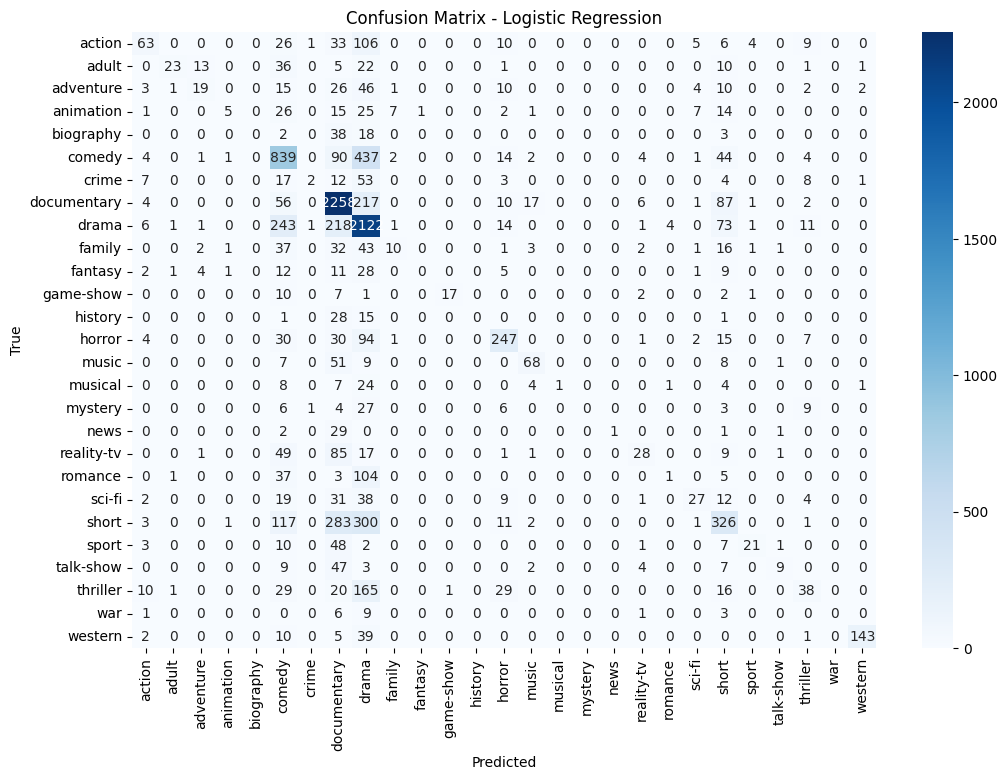

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Test accuracy: {accuracy:.4f}")
le = LabelEncoder()
df['label'] = le.fit_transform(df['genre'])

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix (optional, to visualize)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


SVM Test Accuracy: 0.5085

SVM Classification Report:
              precision    recall  f1-score   support

      action       0.32      0.45      0.38       263
       adult       0.35      0.54      0.43       112
   adventure       0.19      0.33      0.24       139
   animation       0.17      0.22      0.19       104
   biography       0.01      0.02      0.02        61
      comedy       0.56      0.50      0.53      1443
       crime       0.10      0.16      0.13       107
 documentary       0.76      0.70      0.73      2659
       drama       0.67      0.48      0.56      2697
      family       0.15      0.27      0.19       150
     fantasy       0.08      0.09      0.08        74
   game-show       0.63      0.68      0.65        40
     history       0.04      0.04      0.04        45
      horror       0.52      0.71      0.60       431
       music       0.42      0.71      0.53       144
     musical       0.06      0.10      0.08        50
     mystery       0.04    

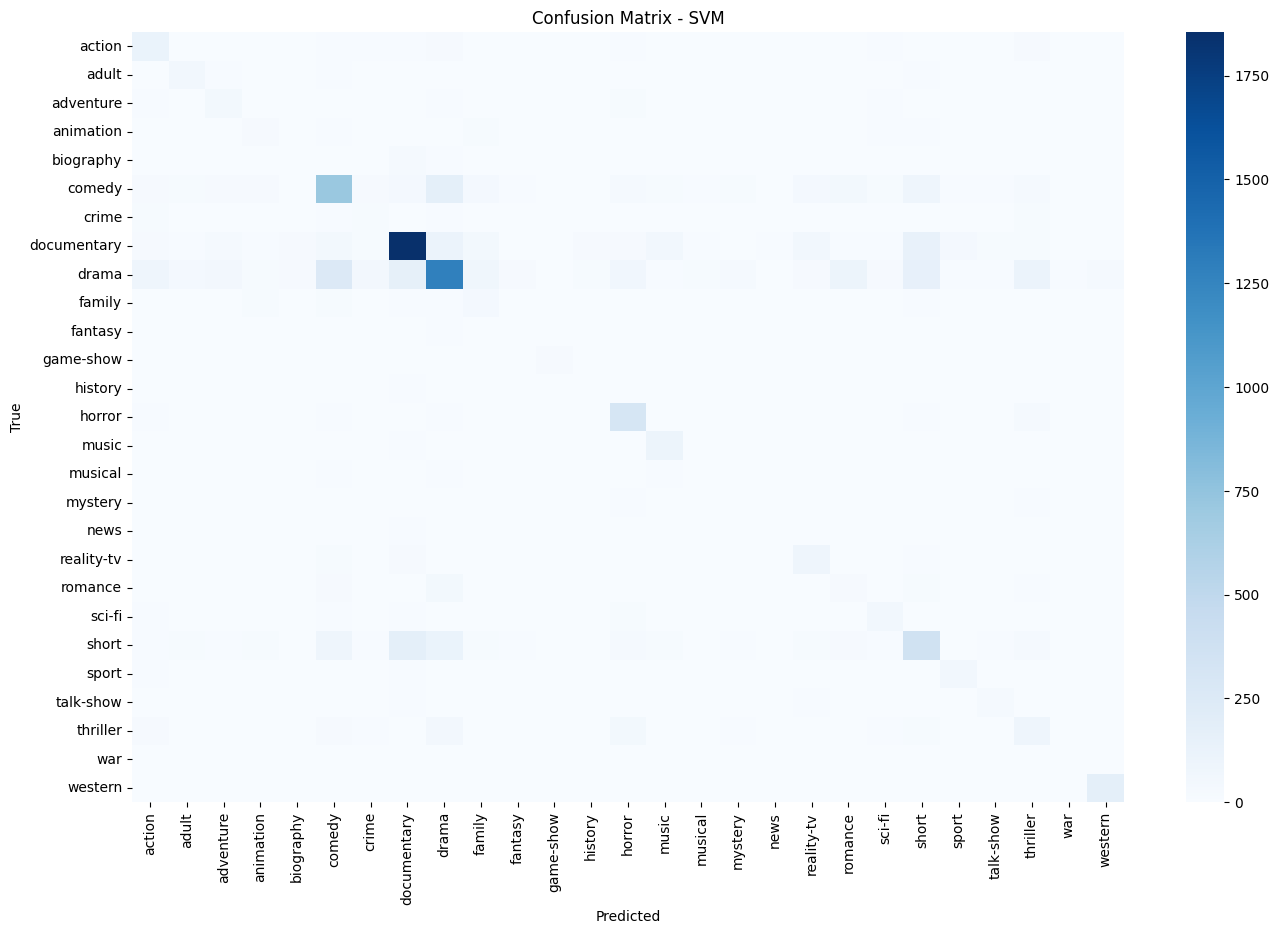

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train the SVM model
svm_model = LinearSVC(class_weight='balanced', max_iter=5000, dual=False)
svm_model.fit(X_train_tfidf, y_train)

# Step 2: Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Step 3: Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

# Step 4: Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(16, 10))
sns.heatmap(cm, annot=False, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Random Forest Test Accuracy: 0.3141

Random Forest Classification Report:
              precision    recall  f1-score   support

      action       0.23      0.15      0.18       263
       adult       0.15      0.60      0.24       112
   adventure       0.21      0.19      0.20       139
   animation       0.13      0.16      0.14       104
   biography       0.00      0.00      0.00        61
      comedy       0.53      0.18      0.27      1443
       crime       0.09      0.36      0.15       107
 documentary       0.72      0.47      0.57      2659
       drama       0.51      0.23      0.32      2697
      family       0.09      0.11      0.10       150
     fantasy       0.05      0.05      0.05        74
   game-show       0.25      0.80      0.38        40
     history       0.02      0.07      0.03        45
      horror       0.34      0.39      0.36       431
       music       0.18      0.78      0.29       144
     musical       0.10      0.22      0.14        50
     my

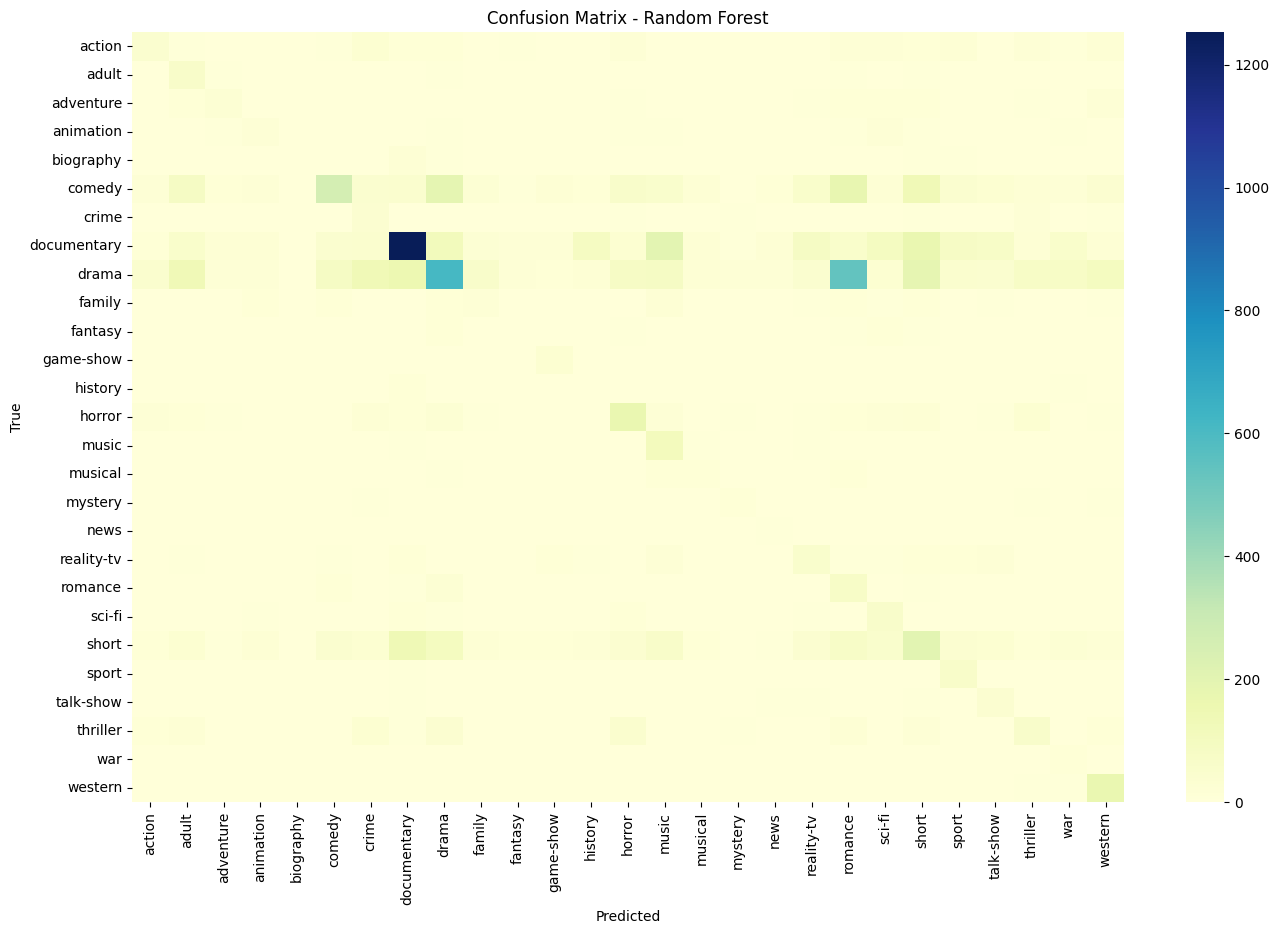

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)

# Step 2: Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Step 3: Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Step 4: Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(16, 10))
sns.heatmap(cm_rf, annot=False, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import pandas as pd

# Replace these variables with the actual accuracy values you observed
results = {
    "Model": ["Logistic Regression", "SVM", "Randome Forest"],
    "Accuracy": [accuracy, svm_accuracy, rf_accuracy]  # Use your recorded values here
}

results_df = pd.DataFrame(results)

# Sort by accuracy to find the best model
results_df = results_df.sort_values("Accuracy", ascending=False)

# Show the results
print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.578069
1                  SVM  0.508531
2       Randome Forest  0.314120


In [ ]:
def load_test_data(file_path):
    titles = []
    plots = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if len(parts) == 3:
                _, title, plot = parts
                titles.append(title)
                plots.append(plot)
    return pd.DataFrame({"title": titles, "plot": plots})

# Load the test data
test_df = load_test_data("test_data.txt")

# Clean the plot texts
test_df['clean_plot'] = test_df['plot'].apply(preprocess_text)  # same clean_text you used earlier
df.head()


,title,genre,plot,clean_plot,label
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents yearold ...,8
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...,24
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...,1
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...,8
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...,8


In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(test_df['clean_plot'])

In [ ]:
# Make predictions (these should be label-encoded integers)
y_test_pred = lr_model.predict(X_test_tfidf)

# Convert back to genre names
predicted_genres = y_test_pred


                                        title predicted_genre
0                        Edgar's Lunch (1998)           drama
1                    La guerra de papá (1977)           drama
2                 Off the Beaten Track (2010)     documentary
3                      Meu Amigo Hindu (2015)           drama
4                           Er nu zhai (1955)           drama
5                          Riddle Room (2016)           drama
6                              L'amica (1969)           drama
7                        Ina Mina Dika (1989)          comedy
8  Equinox Special: Britain's Tornados (2005)     documentary
9                                Press (2011)           drama
Predictions saved to test_predictions_logistic.csv

Predicted Genre Distribution:
predicted_genre
drama          19884
documentary    17010
comedy          8280
short           3350
horror          1916
western          788
action           672
thriller         479
music            442
sci-fi           237
reality-tv

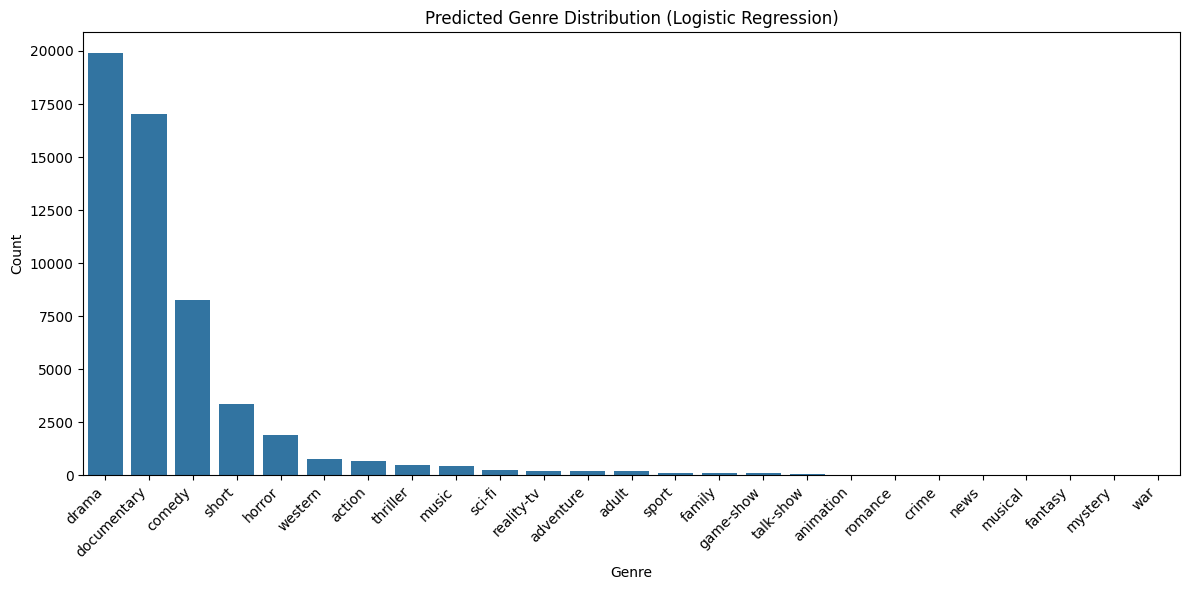

In [ ]:
# 1. Add predicted genres to the test DataFrame
test_df['predicted_genre'] = predicted_genres

# 2. Show top 10 predictions
print(test_df[['title', 'predicted_genre']].head(10))

# 3. Save predictions to CSV
test_df.to_csv("test_predictions_logistic.csv", index=False)
print("Predictions saved to test_predictions_logistic.csv")

# 4. (Optional) Count predicted genres
genre_counts = test_df['predicted_genre'].value_counts()
print("\nPredicted Genre Distribution:")
print(genre_counts)

# 5. (Optional) Plot genre distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Predicted Genre Distribution (Logistic Regression)")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
